1. Importing libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt
import seaborn as sns

In [2]:
# Specify the full file path with quotes
file_path = "C:\\Users\\nehma\\OneDrive\\Desktop\\Final Achievement\\Achievement_2\\new_2022_data.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path, index_col=0)

C:\Users\nehma\AppData\Local\Temp\ipykernel_29504\3663249288.py:5: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, index_col=0)


In [3]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_time,date,avgTemp,_merge
0,55262E4365A955A2,classic_bike,2022-01-18 08:23:52,2022-01-18 08:28:18,Boerum Pl\t& Pacific St,4488.09,Clinton St & Joralemon St,4605.04,40.688489,-73.991160,40.692395,-73.993379,member,2022-01-18 08:23:52,2022-01-18,-2.0,both
1,D272F1B15D841EC0,classic_bike,2022-01-21 09:03:22,2022-01-21 09:05:44,E 12 St & Ave C,5616.08,E 10 St & Avenue A,5659.05,40.727243,-73.976831,40.727408,-73.981420,member,2022-01-21 09:03:22,2022-01-21,-10.0,both
2,D1FCEF55EB4A807F,classic_bike,2022-01-22 14:28:32,2022-01-22 14:53:18,W 21 St & 6 Ave,6140.05,W 44 St & 11 Ave,6756.05,40.741740,-73.994156,40.762009,-73.996975,member,2022-01-22 14:28:32,2022-01-22,-5.0,both
3,E9CBDC6A0162C068,electric_bike,2022-01-19 14:49:47,2022-01-19 14:54:02,38 St & 30 Ave,6850.01,Crescent St & 30 Ave,6958.06,40.764175,-73.915840,40.768692,-73.924957,member,2022-01-19 14:49:47,2022-01-19,-1.1,both
4,2177A5B57326CE9B,electric_bike,2022-01-16 14:36:06,2022-01-16 14:44:06,Pacific St & Nevins St,4362.04,Clinton St & Tillary St,4748.07,40.685376,-73.983021,40.696233,-73.991421,member,2022-01-16 14:36:06,2022-01-16,-6.9,both


In [4]:
df.shape

(30689921, 17)

In [5]:
df.drop(columns = {'_merge'}, inplace = True)

In [6]:
df.shape

(30689921, 16)

In [7]:
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
start_time             object
date                   object
avgTemp               float64
dtype: object

<Axes: >

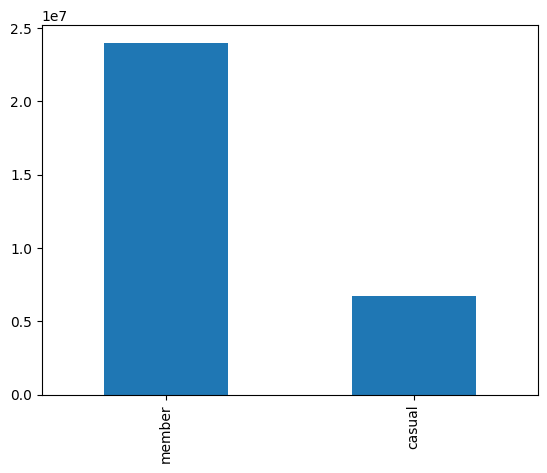

In [8]:
df['member_casual'].value_counts().plot(kind = 'bar')

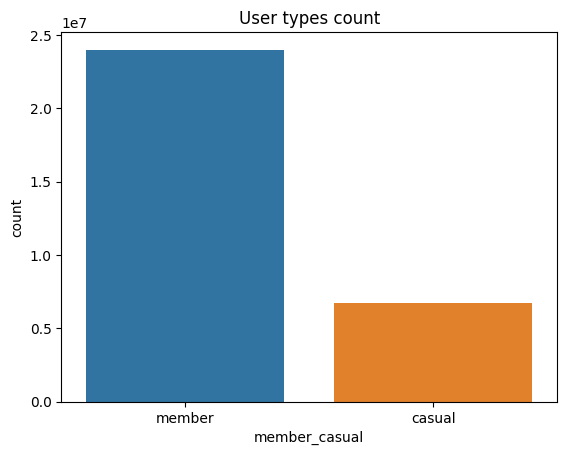

In [9]:
sns.countplot(data = df, x = 'member_casual') #plotting in seaborn to see the difference
plt.title("User types count")
plt.show()

2. Types of Plots

In [10]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'start_time', 'date', 'avgTemp'],
      dtype='object')

Q4:Create a bar chart of the top 20 starting stations frequencies. Does the color palette you chose when you set the theme in the previous step make sense in this plot? If not, change the style of this specific plot temporarily. Hint: Does the default setting of the palette contain enough colors?

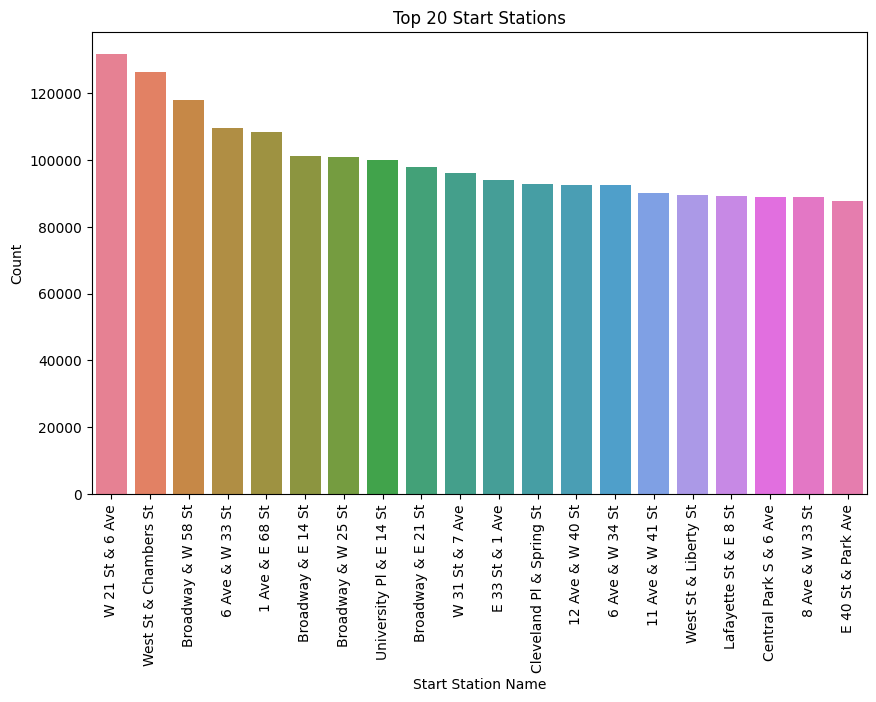

In [11]:
# Choose a color palette (e.g., "husl")
palette = "husl"

# Plotting the bar chart with Seaborn
start_station_counts = df['start_station_name'].value_counts().head(20)
plt.figure(figsize=(10, 6))
sns.barplot(x=start_station_counts.index, y=start_station_counts.values, palette=palette)
plt.title('Top 20 Start Stations')
plt.xlabel('Start Station Name')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


Having multiple colors does not look appealing, I will use shades of one color.

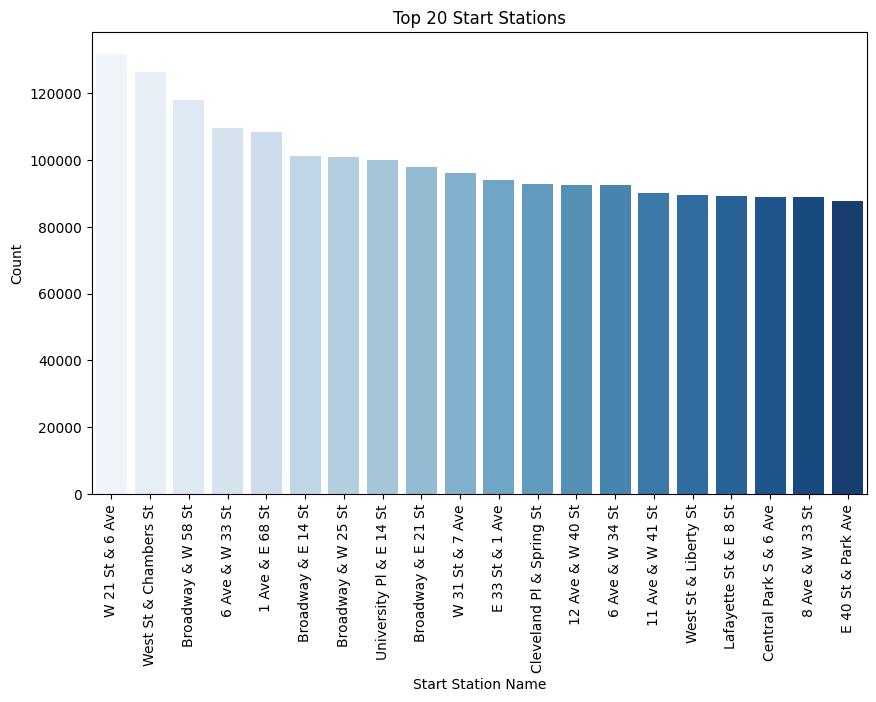

In [12]:
# Define the color palette
palette = "Blues"

# Plotting the bar chart with Seaborn
start_station_counts = df['start_station_name'].value_counts().head(20)
plt.figure(figsize=(10, 6))
sns.barplot(x=start_station_counts.index, y=start_station_counts.values, palette=palette)
plt.title('Top 20 Start Stations')
plt.xlabel('Start Station Name')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

5. Recreate the dual-axis line plot from the previous Exercise using seaborn.

In [13]:
# Groupby the count of the trips 

df_group = pd.DataFrame(df.groupby(['date'])['ride_id'].count()).reset_index()

In [14]:
df_group.rename(columns = {'ride_id':'bike_rides_daily'}, inplace = True)
df = df.merge(df_group, on = "date", how = 'outer', indicator = True)
print(df['_merge'].value_counts(dropna = False))
print("Shape of January 1st is", df[df['date'] == '2022-01-01'].shape) # Check 
print("Shape of January 2nd is", df[df['date'] == '2022-01-02'].shape) # Second check 

df_temp = df.set_index('date')

print(df_temp.columns)

both          30689921
left_only            0
right_only           0
Name: _merge, dtype: int64
Shape of January 1st is (20895, 18)
Shape of January 2nd is (44234, 18)
Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'start_time', 'avgTemp', 'bike_rides_daily', '_merge'],
      dtype='object')


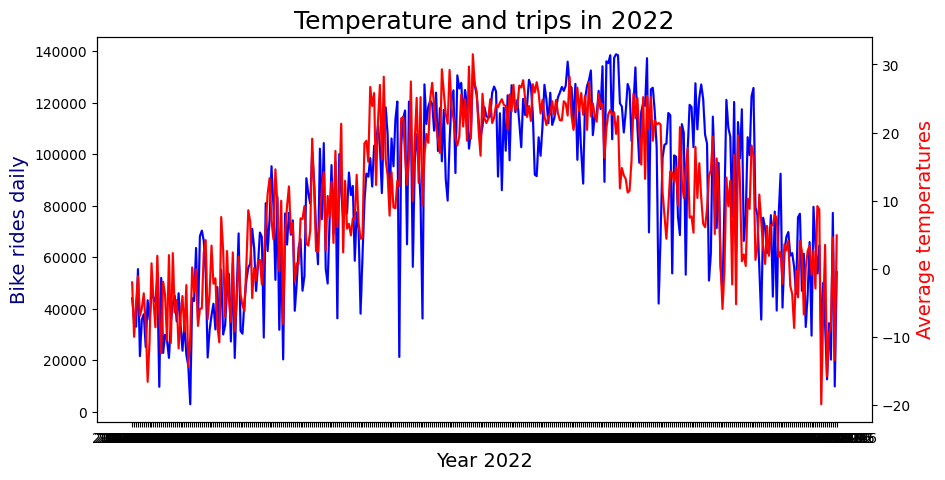

In [15]:
fig,ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data = df_temp['bike_rides_daily'], color = "b")
ax.set_xlabel("Year 2022", fontsize = 14) # set x-axis label
ax.set_ylabel("Bike rides daily",color = "navy", fontsize = 14) # set y-axis label

ax2 = ax.twinx()
sns.lineplot(data = df_temp['avgTemp'], color="r", ax=ax2)
ax2.set_ylabel("Average temperatures", color = "red",fontsize=14)
plt.title('Temperature and trips in 2022', fontsize = 18)
plt.show()

6. Make a box plot of one of the categorical variables in your data set. What does this plot tell you about the variable? Write down a 3 to 5-sentence analysis of the elements of the box plot.

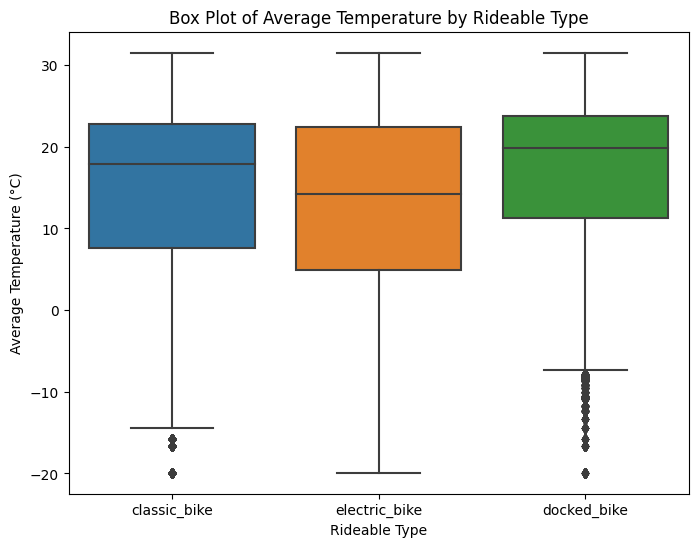

In [16]:
# Creating the box plot for average temperature
plt.figure(figsize=(8, 6))
sns.boxplot(x='rideable_type', y='avgTemp', data=df)
plt.title('Box Plot of Average Temperature by Rideable Type')
plt.xlabel('Rideable Type')
plt.ylabel('Average Temperature (°C)')
plt.show()

This box plot shows the distribution of average temperatures for different rideable types.   

7.Think of how the FacetGrid plot would make sense to aid the analysis questions in the project. Create a FacetGrid and write 2 to 3 sentences analyzing what insight its output brings.

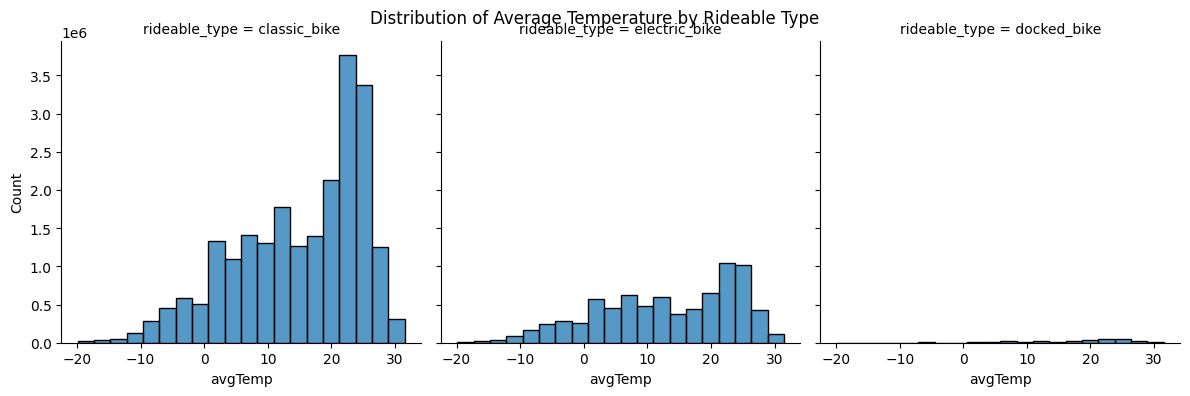

In [17]:
# Creating a FacetGrid plot
g = sns.FacetGrid(df, col='rideable_type', col_wrap=3, height=4)
g.map(sns.histplot, 'avgTemp', bins=20)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Average Temperature by Rideable Type')
plt.show()

The FacetGrid plot provides a clear visual comparison of the distribution of average temperature across different rideable types. By examining each subplot, we can observe how the distribution of temperatures varies for each rideable type. This visualization helps identify any potential patterns or differences in temperature preferences among different rideable types, which could inform operational decisions or marketing strategies.